
## Source
Statistics on labour force, unemployment and underemployment: https://data.gov.hk/en-data/dataset/hk-censtatd-tablechart-statistics-on-labour-force-unemployment-and-underemployment


## Methodology

1. [Reading and Understanding the Data](#1) <br>
2. [Data Cleaning](#2)
3. [Data Preparation](#3) <br>
4. [Model Building](#4) <br>
    a. K-means Clustering <br>
    b. Agglomerative Clustering


<a id="1"></a> <br>
### 1 : Reading and Understanding Data

In [78]:
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt

import re
from re import search<a id="1"></a> <br>
### 1 : Reading and Understanding Data

In [160]:
# Reading the data on which analysis needs to be done

under_df = pd.read_excel('Underemployment Rate by Occupation.xls',skiprows=5, skipfooter = 8, header = (0)).dropna(how='all').dropna(axis=1,how="all")

unem_df = pd.read_excel('Unemployment Rate by Previous Occupation.xls', skiprows=5, skipfooter = 8, header = (0)).dropna(how='all').dropna(axis=1,how="all")

In [80]:
under_df.head()

,Unnamed: 0,Managers and administrators,Professionals,Associate professionals,Clerical support workers,Service and sales workers,Craft and related workers,Plant and machine operators and assemblers,Elementary occupations,Other occupations,All occupations
0,2011,##,0.2,0.7,0.6,1.8,6.3,2.4,3.0,##,1.7
1,2012,##,0.1,0.5,0.5,1.6,6.5,1.8,2.7,##,1.5
2,2013,##,0.3,0.5,0.5,1.5,6.5,1.6,2.6,##,1.5
3,2014,##,0.4,0.7,0.5,1.5,5.9,1.6,2.5,##,1.5
4,2015,##,0.2,0.8,0.4,1.5,5.4,1.9,2.2,8.2,1.4


In [81]:
unem_df.head()

,Unnamed: 0,Managers and administrators,Professionals,Associate professionals,Clerical support workers,Service and sales workers,Craft and related workers,Plant and machine operators and assemblers,Elementary occupations,Other occupations,All occupations
0,2011,1.3,1.2,2.1,3.5,4.5,4.9,2.2,3.5,##,3.4
1,2012,1.4,1.5,2.2,3.1,4.0,4.8,2.0,3.2,##,3.3
2,2013,1.6,1.5,2.2,3.1,4.4,4.8,1.9,3.2,##,3.4
3,2014,1.3,1.4,2.0,3.0,4.3,4.7,1.8,3.3,##,3.3
4,2015,1.4,1.6,2.0,3.2,4.6,3.5,2.5,3.0,##,3.3


In [82]:
#changing Unnamed:0 column to Period

under_df.rename(columns={under_df.columns[0]: 'Period'}, inplace = True)
unem_df.rename(columns={unem_df.columns[0]: 'Period'}, inplace = True)

In [83]:
#changing All Industries column to Mean. All Occupation column is the mean of all the Occupation in this data set.

under_df.rename(columns={under_df.columns[-1]: 'Mean'}, inplace = True)
unem_df.rename(columns={unem_df.columns[-1]: 'Mean'}, inplace = True)

In [84]:
#change all non-numeric values to zero

under_df.replace(["##",'#'], 0, inplace = True)
unem_df.replace(["##",'#'], 0, inplace = True)

In [85]:
under_df.head()

,Period,Managers and administrators,Professionals,Associate professionals,Clerical support workers,Service and sales workers,Craft and related workers,Plant and machine operators and assemblers,Elementary occupations,Other occupations,Mean
0,2011,0.0,0.2,0.7,0.6,1.8,6.3,2.4,3.0,0.0,1.7
1,2012,0.0,0.1,0.5,0.5,1.6,6.5,1.8,2.7,0.0,1.5
2,2013,0.0,0.3,0.5,0.5,1.5,6.5,1.6,2.6,0.0,1.5
3,2014,0.0,0.4,0.7,0.5,1.5,5.9,1.6,2.5,0.0,1.5
4,2015,0.0,0.2,0.8,0.4,1.5,5.4,1.9,2.2,8.2,1.4


In [86]:
unem_df.head()

,Period,Managers and administrators,Professionals,Associate professionals,Clerical support workers,Service and sales workers,Craft and related workers,Plant and machine operators and assemblers,Elementary occupations,Other occupations,Mean
0,2011,1.3,1.2,2.1,3.5,4.5,4.9,2.2,3.5,0.0,3.4
1,2012,1.4,1.5,2.2,3.1,4.0,4.8,2.0,3.2,0.0,3.3
2,2013,1.6,1.5,2.2,3.1,4.4,4.8,1.9,3.2,0.0,3.4
3,2014,1.3,1.4,2.0,3.0,4.3,4.7,1.8,3.3,0.0,3.3
4,2015,1.4,1.6,2.0,3.2,4.6,3.5,2.5,3.0,0.0,3.3


In [161]:
# df info

under_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  124 non-null    object 
 1   Managers and administrators                 124 non-null    object 
 2   Professionals                               124 non-null    object 
 3   Associate professionals                     124 non-null    float64
 4   Clerical support workers                    124 non-null    float64
 5   Service and sales workers                   124 non-null    float64
 6   Craft and related workers                   124 non-null    float64
 7   Plant and machine operators and assemblers  124 non-null    float64
 8   Elementary occupations                      124 non-null    float64
 9   Other occupations                           124 non-null    object 
 10  All occupation

In [88]:
unem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 0 to 123
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Period                                      124 non-null    object 
 1   Managers and administrators                 124 non-null    float64
 2   Professionals                               124 non-null    float64
 3   Associate professionals                     124 non-null    float64
 4   Clerical support workers                    124 non-null    float64
 5   Service and sales workers                   124 non-null    float64
 6   Craft and related workers                   124 non-null    float64
 7   Plant and machine operators and assemblers  124 non-null    float64
 8   Elementary occupations                      124 non-null    float64
 9   Other occupations                           124 non-null    float64
 10  Mean          

In [162]:
# df description

under_df.describe()

,Associate professionals,Clerical support workers,Service and sales workers,Craft and related workers,Plant and machine operators and assemblers,Elementary occupations,All occupations
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,0.748387,0.560484,1.714516,5.694355,1.936290,2.328226,1.475806
std,0.486147,0.387155,1.122403,1.148792,1.015597,0.530770,0.527823
min,0.300000,0.200000,0.900000,3.700000,1.100000,1.400000,1.000000
25%,0.600000,0.400000,1.300000,4.700000,1.500000,1.900000,1.200000
50%,0.600000,0.500000,1.500000,5.600000,1.650000,2.400000,1.400000
75%,0.700000,0.600000,1.700000,6.325000,1.900000,2.700000,1.500000
max,3.200000,2.300000,7.400000,9.300000,6.700000,3.800000,3.800000


In [90]:
unem_df.describe()

,Managers and administrators,Professionals,Associate professionals,Clerical support workers,Service and sales workers,Craft and related workers,Plant and machine operators and assemblers,Elementary occupations,Other occupations,Mean
count,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000,124.000000
mean,1.433065,1.482258,2.286290,3.281452,4.535484,4.862097,2.264516,3.051613,0.388710,3.366129
std,0.389855,0.337867,0.590622,0.676356,1.370787,1.610564,0.880059,0.552082,2.505545,0.687979
min,0.800000,0.800000,1.700000,1.900000,3.000000,3.000000,1.000000,2.000000,0.000000,2.600000
25%,1.200000,1.200000,2.000000,2.900000,4.000000,4.000000,1.800000,2.700000,0.000000,3.100000
50%,1.400000,1.500000,2.200000,3.200000,4.300000,4.600000,2.100000,3.000000,0.000000,3.300000
75%,1.600000,1.700000,2.300000,3.500000,4.600000,5.100000,2.500000,3.300000,0.000000,3.425000
max,3.100000,2.700000,4.900000,6.500000,10.700000,11.500000,6.400000,5.200000,18.500000,6.700000


In [91]:
#understanding more of the data using Pandas Profiling Report

profile_Under = ProfileReport(under_df, title='Summary of Underemployment Data: OCCUPATION', explorative=True)
profile_UnEm = ProfileReport(unem_df, title='Summary of Unemployment Data: OCCUPATION', explorative=True)

In [92]:
#exported the file to HTML

profile_Under.to_file("Underemployment Data_Occupation.html")
profile_UnEm.to_file("Unemployment Data_Occupation.html")

<a id="2"></a> <br>
### 2 : Data Cleaning

In [93]:
<a id="2"></a> <br>
### 2 : Data Cleaning#check if has NaN Values 

unem_df.isna().sum() 

Period                                        0
Managers and administrators                   0
Professionals                                 0
Associate professionals                       0
Clerical support workers                      0
Service and sales workers                     0
Craft and related workers                     0
Plant and machine operators and assemblers    0
Elementary occupations                        0
Other occupations                             0
Mean                                          0
dtype: int64

In [94]:
under_df.isna().sum() 

Period                                        0
Managers and administrators                   0
Professionals                                 0
Associate professionals                       0
Clerical support workers                      0
Service and sales workers                     0
Craft and related workers                     0
Plant and machine operators and assemblers    0
Elementary occupations                        0
Other occupations                             0
Mean                                          0
dtype: int64

In [95]:
#get monthly data only 

monthly_under_df = under_df.iloc[12:,:]
monthly_unem_df = unem_df.iloc[12:,:]

In [96]:
monthly_under_df.head()

,Period,Managers and administrators,Professionals,Associate professionals,Clerical support workers,Service and sales workers,Craft and related workers,Plant and machine operators and assemblers,Elementary occupations,Other occupations,Mean
12,4/2011 - 6/2011,0.0,0.3,0.7,0.8,1.8,6.2,2.7,3.2,0.0,1.8
13,5/2011 - 7/2011,0.0,0.3,0.6,0.6,1.8,6.4,2.8,3.0,10.6,1.7
14,6/2011 - 8/2011,0.0,0.2,0.7,0.7,2.0,6.8,3.0,3.1,14.8,1.8
15,7/2011 - 9/2011,0.0,0.0,0.6,0.6,2.0,6.5,2.3,3.3,14.3,1.8
16,8/2011 - 10/2011,0.0,0.0,0.6,0.4,1.7,6.1,1.9,3.0,0.0,1.6


In [97]:
monthly_unem_df.head()

,Period,Managers and administrators,Professionals,Associate professionals,Clerical support workers,Service and sales workers,Craft and related workers,Plant and machine operators and assemblers,Elementary occupations,Other occupations,Mean
12,4/2011 - 6/2011,1.2,1.1,2.2,4.3,4.8,5.6,2.7,3.8,0.0,3.7
13,5/2011 - 7/2011,1.0,1.2,1.9,4.0,5.3,5.1,2.2,3.7,0.0,3.7
14,6/2011 - 8/2011,1.1,1.4,1.8,3.6,5.0,3.8,1.9,3.7,0.0,3.5
15,7/2011 - 9/2011,1.3,1.2,1.9,3.2,4.9,4.0,1.9,3.4,0.0,3.4
16,8/2011 - 10/2011,1.4,1.0,1.9,3.1,4.5,4.7,2.4,3.4,0.0,3.4


<a id="3"></a> <br>
### 3 : Data Preparation

In [98]:
#get only data from 2019 (Extradition Law Protests) - 2020 (Covid 19 Pandemic)


search_values = ['2020']

underNew_df = monthly_under_df[monthly_under_df.Period.str.contains('|'.join(search_values), case=False)]
unempNew_df = monthly_unem_df[monthly_unem_df.Period.str.contains('|'.join(search_values), case=False)]

In [99]:
underNew_df

,Period,Managers and administrators,Professionals,Associate professionals,Clerical support workers,Service and sales workers,Craft and related workers,Plant and machine operators and assemblers,Elementary occupations,Other occupations,Mean
115,11/2019 - 1/2020,0.1,0.2,0.7,0.6,1.5,5.2,1.3,1.6,0.0,1.2
116,12/2019 - 2/2020,0.2,0.3,0.8,0.7,2.4,5.6,2.6,1.9,0.0,1.5
117,1/2020 - 3/2020,0.5,0.4,1.3,1.2,3.8,6.7,3.6,2.4,0.0,2.1
118,2/2020 - 4/2020,0.9,0.9,2.1,1.7,5.6,8.7,5.4,3.0,0.0,3.1
119,3/2020 - 5/2020,1.4,0.9,2.6,2.2,6.2,9.3,5.6,3.3,0.0,3.5
120,4/2020 - 6/2020,1.5,1.1,3.0,2.3,6.3,9.3,6.7,3.2,0.0,3.7
121,5/2020 - 7/2020,1.3,1.1,2.8,2.2,5.8,8.5,6.7,3.2,0.0,3.5
122,6/2020 - 8/2020,1.4,1.5,3.2,2.2,7.1,8.3,6.1,3.5,0.0,3.8
123,7/2020 - 9/2020 #,1.3,1.1,3.0,2.3,7.4,8.0,5.5,3.8,0.0,3.8


In [100]:
# reseting index to zero(0)

unempNew_df.reset_index(drop=True, inplace = True)

In [101]:
underNew_df.reset_index(drop=True, inplace = True)

In [102]:
# change values of Period from 1/2019 to January 2019

month_values = {'1/2': 'January', '2/2': 'February','3/': 'March', '4/': 'April', '5/': 'May', '6/': 'June',
                '7/': 'July', '8/': 'August', '9/': 'September', '10/': 'October', '11/': 'November', '12/': 'December',}

year_values = ['2019', '2020']

In [103]:
#create MONTH columns

unempNew_df['Month'] = np.nan
underNew_df['Month'] = np.nan

<ipython-input-103-881ee5340e62>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unempNew_df['Month'] = np.nan
<ipython-input-103-881ee5340e62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underNew_df['Month'] = np.nan


In [104]:
#loop around the PERIOD column, change the values to year_values and write a value in MONTH column

for key in month_values:
    for row in range(0, len(underNew_df)):
        for i in range(0, len(year_values)):
            if((year_values[i] in underNew_df.iloc[row]['Period'][5:16]) and (key in underNew_df.iloc[row]['Period'][5:16])):
                underNew_df['Month'].iloc[row] = month_values[key] 
                underNew_df['Period'].iloc[row] = year_values[i]

underNew_df

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-104-3c0df6b7d58a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underNew_df['Month'].iloc[row] = month_values[key]
<ipython-input-104-3c0df6b7d58a>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  underNew_df['Period'].iloc[row] = year_values[i]


,Period,Managers and administrators,Professionals,Associate professionals,Clerical support workers,Service and sales workers,Craft and related workers,Plant and machine operators and assemblers,Elementary occupations,Other occupations,Mean,Month
0,2020,0.1,0.2,0.7,0.6,1.5,5.2,1.3,1.6,0.0,1.2,January
1,2020,0.2,0.3,0.8,0.7,2.4,5.6,2.6,1.9,0.0,1.5,February
2,2020,0.5,0.4,1.3,1.2,3.8,6.7,3.6,2.4,0.0,2.1,March
3,2020,0.9,0.9,2.1,1.7,5.6,8.7,5.4,3.0,0.0,3.1,April
4,2020,1.4,0.9,2.6,2.2,6.2,9.3,5.6,3.3,0.0,3.5,May
5,2020,1.5,1.1,3.0,2.3,6.3,9.3,6.7,3.2,0.0,3.7,June
6,2020,1.3,1.1,2.8,2.2,5.8,8.5,6.7,3.2,0.0,3.5,July
7,2020,1.4,1.5,3.2,2.2,7.1,8.3,6.1,3.5,0.0,3.8,August
8,2020,1.3,1.1,3.0,2.3,7.4,8.0,5.5,3.8,0.0,3.8,September


In [105]:
#loop around the PERIOD column, change the values to year_values and write a value in MONTH column

for key in month_values:
    for row in range(0, len(unempNew_df)):
        for i in range(0, len(year_values)):
            if((year_values[i] in unempNew_df.iloc[row]['Period'][5:16]) and (key in unempNew_df.iloc[row]['Period'][5:16])):
                unempNew_df['Month'].iloc[row] = month_values[key] 
                unempNew_df['Period'].iloc[row] = year_values[i]

unempNew_df

C:\Users\USER\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-105-b553fd3f2b1d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unempNew_df['Month'].iloc[row] = month_values[key]
<ipython-input-105-b553fd3f2b1d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unempNew_df['Period'].iloc[row] = year_values[i]


,Period,Managers and administrators,Professionals,Associate professionals,Clerical support workers,Service and sales workers,Craft and related workers,Plant and machine operators and assemblers,Elementary occupations,Other occupations,Mean,Month
0,2020,1.5,1.3,2.4,2.9,4.3,5.7,2.4,2.4,0.0,3.1,January
1,2020,1.6,1.4,2.7,2.8,5.1,6.9,2.6,2.8,0.0,3.4,February
2,2020,1.7,1.5,3.3,3.8,6.5,9.3,3.7,3.1,0.0,4.2,March
3,2020,2.4,2.1,4.3,4.5,8.9,11.0,4.2,4.0,0.0,5.2,April
4,2020,3.1,2.3,4.7,5.4,10.6,11.5,5.4,4.4,0.0,6.0,May
5,2020,3.0,2.1,4.8,5.8,10.7,11.2,5.7,4.7,0.0,6.2,June
6,2020,2.7,2.1,4.5,5.5,10.4,11.1,6.4,4.8,0.0,6.3,July
7,2020,2.3,2.5,4.8,5.9,9.9,10.3,5.8,5.1,0.0,6.4,August
8,2020,2.5,2.7,4.9,6.5,10.4,10.0,5.7,5.2,0.0,6.7,September


### Data Analysis

#### Q1: What has the highest impact on unemployment and underemployment rate? Is it 2019 or 2020?

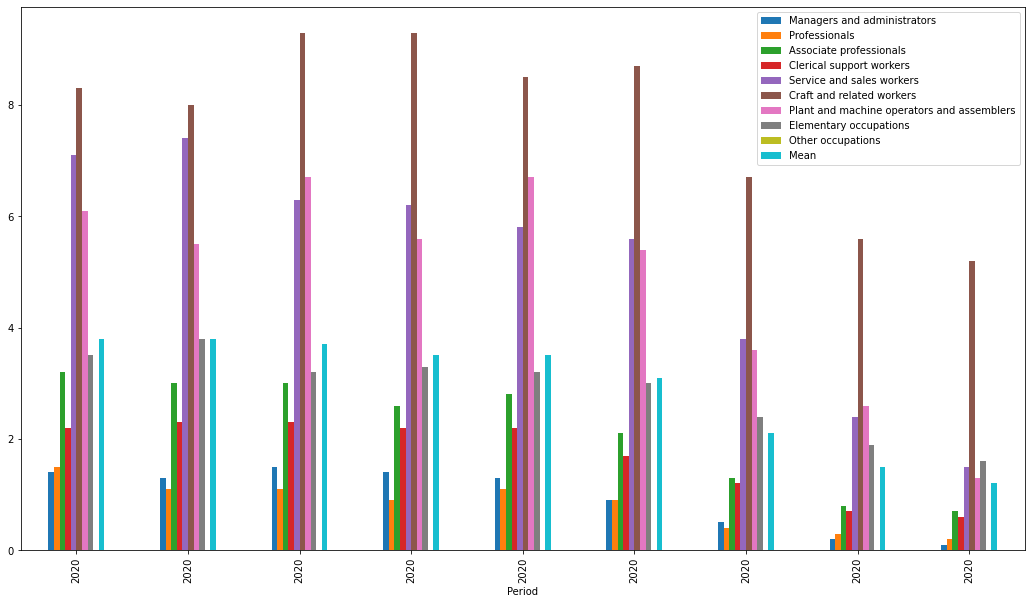

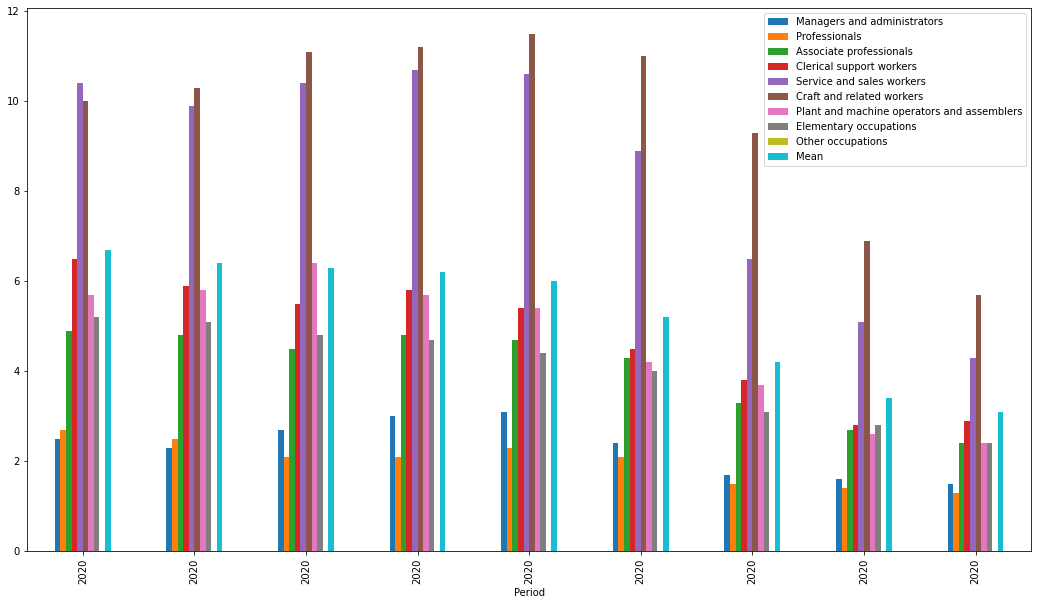

In [106]:
bar1 = underNew_df.sort_values('Mean', ascending = False).plot.bar(x='Period', figsize=(18,10))
bar2 = unempNew_df.sort_values('Mean', ascending = False).plot.bar(x='Period', figsize=(18,10))

#### Q2: Among the years of 2019 and 2020, what is the MONTH that has the highest unemployment and underemployment rate? (peak month)

In [107]:
#get 2019 and 2020 data
unemp2020_df = unempNew_df.loc[unempNew_df['Period'] == '2020']

In [108]:
under2020_df = underNew_df.loc[underNew_df['Period'] == '2020']

In [109]:
under2020_df.T

,0,1,2,3,4,5,6,7,8
Period,2020,2020,2020,2020,2020,2020,2020,2020,2020
Managers and administrators,0.1,0.2,0.5,0.9,1.4,1.5,1.3,1.4,1.3
Professionals,0.2,0.3,0.4,0.9,0.9,1.1,1.1,1.5,1.1
Associate professionals,0.7,0.8,1.3,2.1,2.6,3,2.8,3.2,3
Clerical support workers,0.6,0.7,1.2,1.7,2.2,2.3,2.2,2.2,2.3
Service and sales workers,1.5,2.4,3.8,5.6,6.2,6.3,5.8,7.1,7.4
Craft and related workers,5.2,5.6,6.7,8.7,9.3,9.3,8.5,8.3,8
Plant and machine operators and assemblers,1.3,2.6,3.6,5.4,5.6,6.7,6.7,6.1,5.5
Elementary occupations,1.6,1.9,2.4,3,3.3,3.2,3.2,3.5,3.8
Other occupations,0,0,0,0,0,0,0,0,0


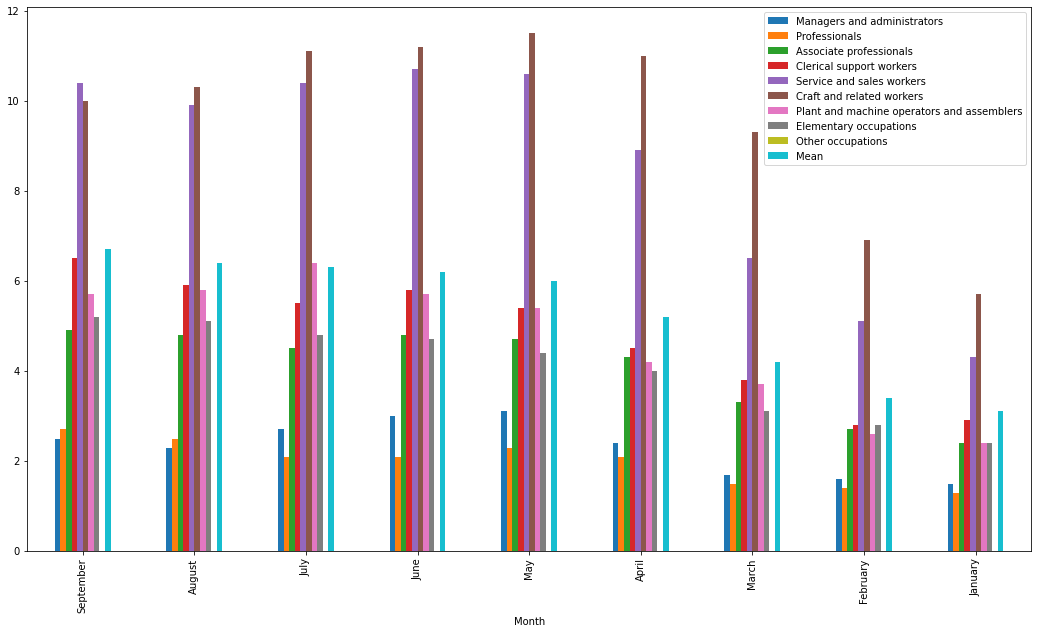

In [110]:
#Unemployment Rate 2020: PEAK MONTH

bar2 = unemp2020_df.sort_values('Mean', ascending = False).plot.bar(x='Month', figsize=(18,10))

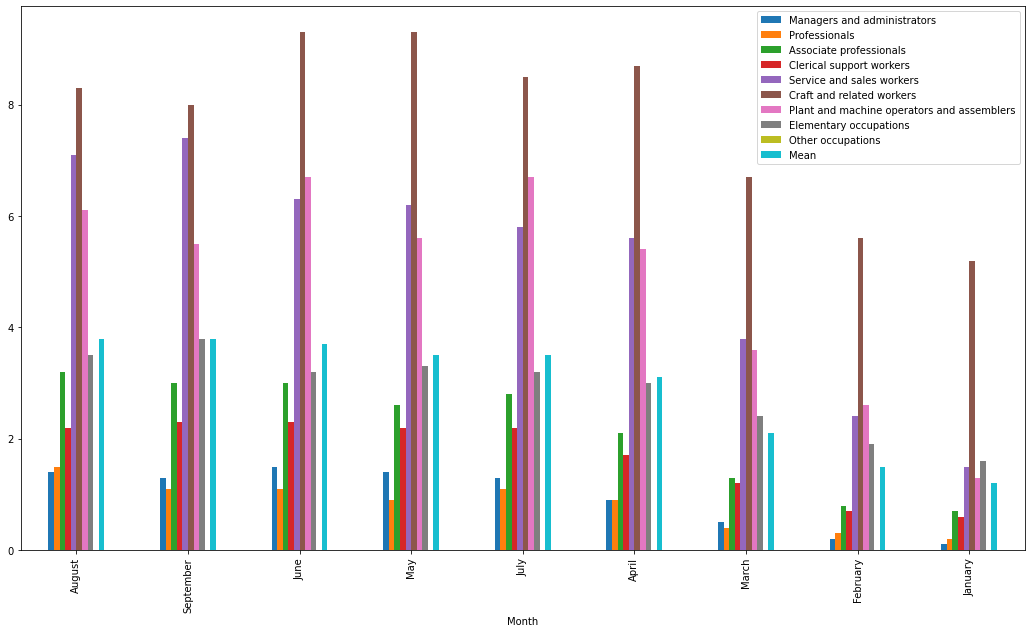

In [111]:
#Underemployment Rate 2020: PEAK MONTH

bar2 = under2020_df.sort_values('Mean', ascending = False).plot.bar(x='Month', figsize=(18,10))

#### Unemployment Data

In [112]:
#Transform the data using transpose

unemp2020_df_T = unemp2020_df.T 
unemp2020_df_T

,0,1,2,3,4,5,6,7,8
Period,2020,2020,2020,2020,2020,2020,2020,2020,2020
Managers and administrators,1.5,1.6,1.7,2.4,3.1,3,2.7,2.3,2.5
Professionals,1.3,1.4,1.5,2.1,2.3,2.1,2.1,2.5,2.7
Associate professionals,2.4,2.7,3.3,4.3,4.7,4.8,4.5,4.8,4.9
Clerical support workers,2.9,2.8,3.8,4.5,5.4,5.8,5.5,5.9,6.5
Service and sales workers,4.3,5.1,6.5,8.9,10.6,10.7,10.4,9.9,10.4
Craft and related workers,5.7,6.9,9.3,11,11.5,11.2,11.1,10.3,10
Plant and machine operators and assemblers,2.4,2.6,3.7,4.2,5.4,5.7,6.4,5.8,5.7
Elementary occupations,2.4,2.8,3.1,4,4.4,4.7,4.8,5.1,5.2
Other occupations,0,0,0,0,0,0,0,0,0


In [113]:
unemp2020_df_T.columns = unemp2020_df_T.iloc[11]
unemp2020_df_T.drop(unemp2020_df_T.index[11], inplace = True)

In [114]:

unemp2020_df_T.drop(unemp2020_df_T.index[0], inplace = True)

In [115]:

unemp2020_df_T['Mean'] = unemp2020_df_T.mean(axis=1)

In [116]:
unemp2020_df_T

Month,January,February,March,April,May,June,July,August,September,Mean
Managers and administrators,1.5,1.6,1.7,2.4,3.1,3,2.7,2.3,2.5,2.311111
Professionals,1.3,1.4,1.5,2.1,2.3,2.1,2.1,2.5,2.7,2.000000
Associate professionals,2.4,2.7,3.3,4.3,4.7,4.8,4.5,4.8,4.9,4.044444
Clerical support workers,2.9,2.8,3.8,4.5,5.4,5.8,5.5,5.9,6.5,4.788889
Service and sales workers,4.3,5.1,6.5,8.9,10.6,10.7,10.4,9.9,10.4,8.533333
Craft and related workers,5.7,6.9,9.3,11,11.5,11.2,11.1,10.3,10,9.666667
Plant and machine operators and assemblers,2.4,2.6,3.7,4.2,5.4,5.7,6.4,5.8,5.7,4.655556
Elementary occupations,2.4,2.8,3.1,4,4.4,4.7,4.8,5.1,5.2,4.055556
Other occupations,0,0,0,0,0,0,0,0,0,0.000000
Mean,3.1,3.4,4.2,5.2,6,6.2,6.3,6.4,6.7,5.277778


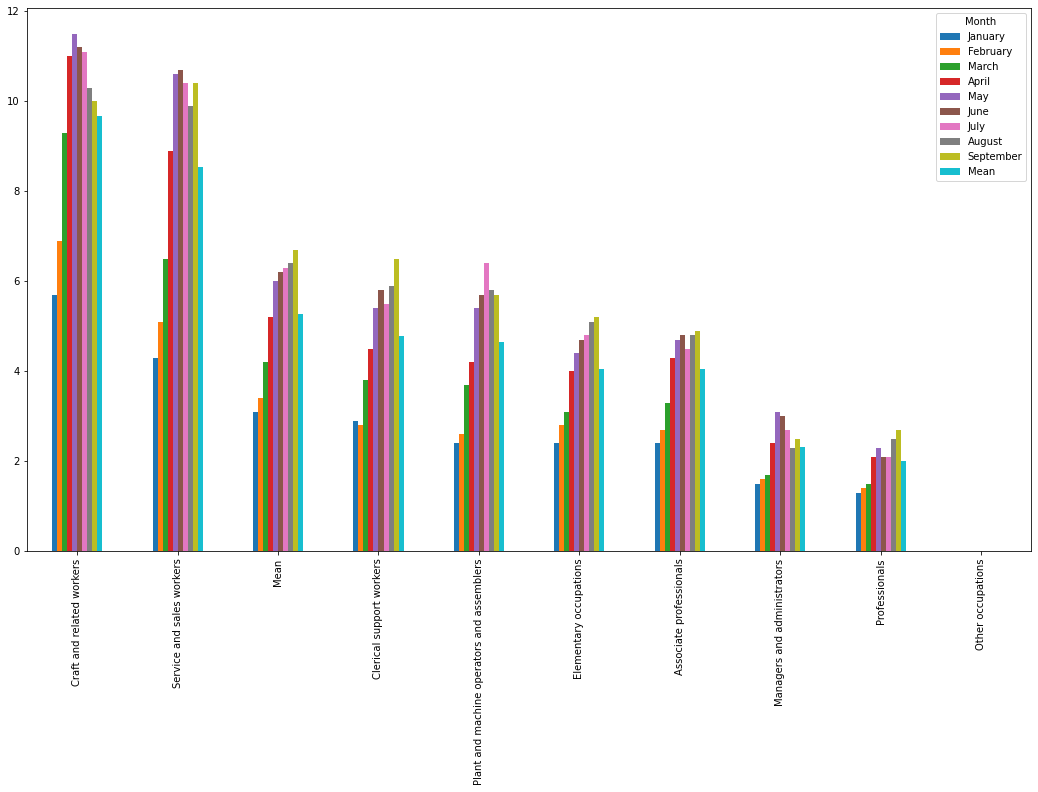

In [117]:
bar2 = unemp2020_df_T.sort_values('Mean', ascending = False).plot.bar(figsize=(18,10))

#### Underemployment Data

In [118]:
 under2020_df_T = under2020_df.T 

In [119]:
#changing column names for 2020

under2020_df_T.columns = under2020_df_T.iloc[11]
under2020_df_T.drop(under2020_df_T.index[11], inplace = True)

In [120]:
under2020_df_T.drop(under2020_df_T.index[0], inplace = True)

In [121]:
# compute for mean per industry 

under2020_df_T['Mean'] = under2020_df_T.mean(axis=1)

In [122]:
under2020_df_T

Month,January,February,March,April,May,June,July,August,September,Mean
Managers and administrators,0.1,0.2,0.5,0.9,1.4,1.5,1.3,1.4,1.3,0.955556
Professionals,0.2,0.3,0.4,0.9,0.9,1.1,1.1,1.5,1.1,0.833333
Associate professionals,0.7,0.8,1.3,2.1,2.6,3,2.8,3.2,3,2.166667
Clerical support workers,0.6,0.7,1.2,1.7,2.2,2.3,2.2,2.2,2.3,1.711111
Service and sales workers,1.5,2.4,3.8,5.6,6.2,6.3,5.8,7.1,7.4,5.122222
Craft and related workers,5.2,5.6,6.7,8.7,9.3,9.3,8.5,8.3,8,7.733333
Plant and machine operators and assemblers,1.3,2.6,3.6,5.4,5.6,6.7,6.7,6.1,5.5,4.833333
Elementary occupations,1.6,1.9,2.4,3,3.3,3.2,3.2,3.5,3.8,2.877778
Other occupations,0,0,0,0,0,0,0,0,0,0.000000
Mean,1.2,1.5,2.1,3.1,3.5,3.7,3.5,3.8,3.8,2.911111


In [123]:
under2020_df_T

Month,January,February,March,April,May,June,July,August,September,Mean
Managers and administrators,0.1,0.2,0.5,0.9,1.4,1.5,1.3,1.4,1.3,0.955556
Professionals,0.2,0.3,0.4,0.9,0.9,1.1,1.1,1.5,1.1,0.833333
Associate professionals,0.7,0.8,1.3,2.1,2.6,3,2.8,3.2,3,2.166667
Clerical support workers,0.6,0.7,1.2,1.7,2.2,2.3,2.2,2.2,2.3,1.711111
Service and sales workers,1.5,2.4,3.8,5.6,6.2,6.3,5.8,7.1,7.4,5.122222
Craft and related workers,5.2,5.6,6.7,8.7,9.3,9.3,8.5,8.3,8,7.733333
Plant and machine operators and assemblers,1.3,2.6,3.6,5.4,5.6,6.7,6.7,6.1,5.5,4.833333
Elementary occupations,1.6,1.9,2.4,3,3.3,3.2,3.2,3.5,3.8,2.877778
Other occupations,0,0,0,0,0,0,0,0,0,0.000000
Mean,1.2,1.5,2.1,3.1,3.5,3.7,3.5,3.8,3.8,2.911111


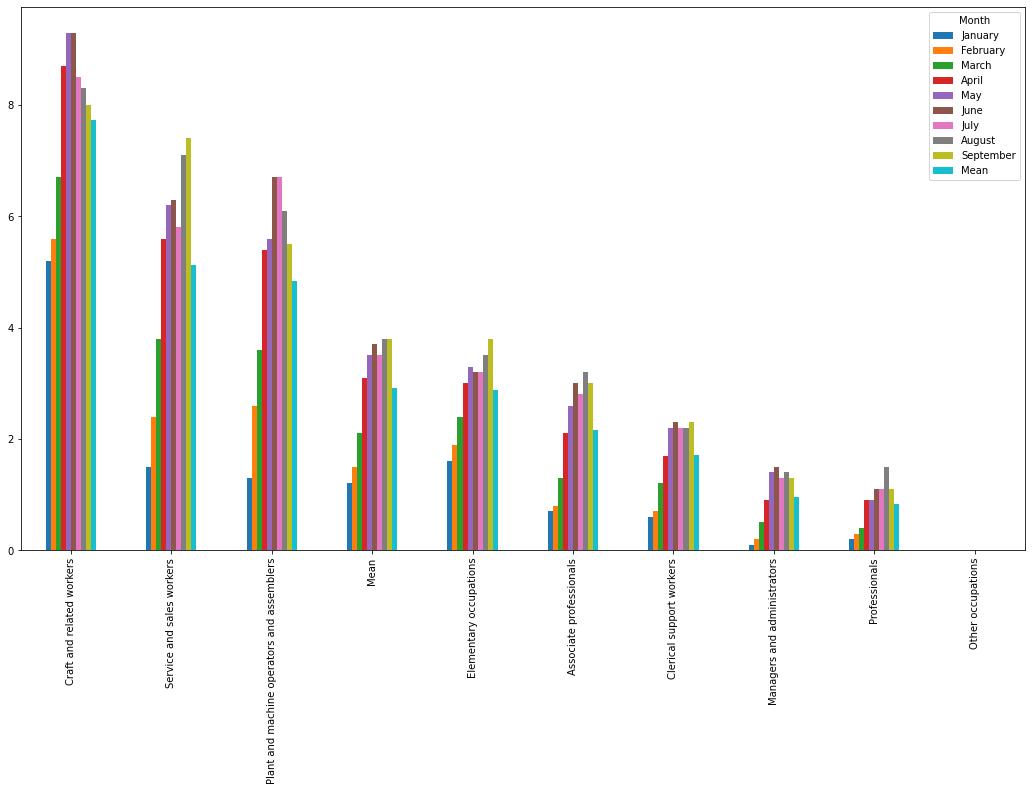

In [124]:
bar2 = under2020_df_T.sort_values('Mean', ascending = False).plot.bar(figsize=(18,10))

<a id="4"></a> <br>
### 4 : Building the Model

### Employing Clustering Algorithms 
1. K-Means Clustering
2. Agglomerative Clustering

#### 1. K-Means Clustering

In [125]:
# Functions for K-Means

def KMeansElbow (r, data):
    distortions = []
    K = range(1,r)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(data)
        distortions.append(kmeanModel.inertia_)
    
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

In [126]:
def KMeansModel (n, data):
    kmeanModel = KMeans(n_clusters=n)
    kmeanModel.fit(data)
    data['k_means']=kmeanModel.predict(data)

In [127]:
def KMeansCluster (data, cond, column):
    cluster = pd.DataFrame(data[data['k_means'] == cond ] [column])
    return cluster

#### Clustering Unemployment Data 2020

##### II. Unemployment Rate 2020

In [128]:
unemp2020_df_T.shape

(10, 10)

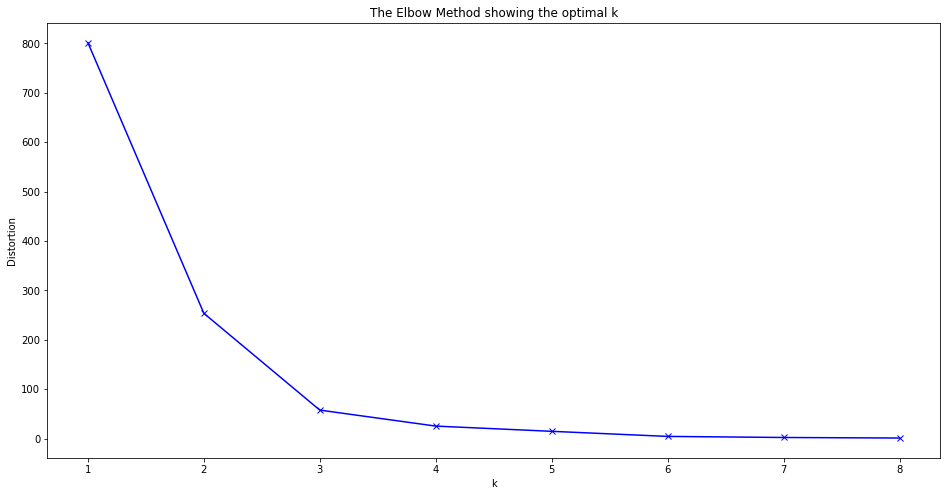

In [129]:
KMeansElbow (9, unemp2020_df_T)

In [130]:
KMeansModel(3, unemp2020_df_T)

In [131]:
KMeansCluster (unemp2020_df_T, 0, 'Mean')

,Mean
Associate professionals,4.044444
Clerical support workers,4.788889
Plant and machine operators and assemblers,4.655556
Elementary occupations,4.055556
Mean,5.277778


In [132]:
KMeansCluster (unemp2020_df_T, 1, 'Mean')

,Mean
Service and sales workers,8.533333
Craft and related workers,9.666667


In [133]:
KMeansCluster (unemp2020_df_T, 2, 'Mean')

,Mean
Managers and administrators,2.311111
Professionals,2.000000
Other occupations,0.000000


#### Clustering Underemployment Data 2020

##### II. Underemployment Rate 2020

In [134]:
under2020_df_T.shape

(10, 10)

In [135]:
KMeansModel(3, under2020_df_T)

In [136]:
KMeansCluster (under2020_df_T, 0, 'Mean')

,Mean
Managers and administrators,0.955556
Professionals,0.833333
Other occupations,0.000000


In [137]:
KMeansCluster (under2020_df_T, 1, 'Mean')

,Mean
Service and sales workers,5.122222
Craft and related workers,7.733333
Plant and machine operators and assemblers,4.833333


In [138]:
KMeansCluster (under2020_df_T, 2, 'Mean')

,Mean
Associate professionals,2.166667
Clerical support workers,1.711111
Elementary occupations,2.877778
Mean,2.911111


#### 2. Agglomerative Clustering 

In [139]:
# functions of Hierarchical Clustering

def Agglomerative(data, n): 
    scaler = StandardScaler()
    X = scaler.fit_transform(data)
    model = AgglomerativeClustering(n_clusters=n, affinity = 'euclidean', linkage = 'ward')
    labels = model.fit_predict(X)
    return (labels)

In [140]:
def AggloLabels(data, agglolabel):
    data.insert((data.shape[1]),'agglomerative',agglolabel)

In [141]:
def AggloCluster (data, cond, column):
    cluster = pd.DataFrame(data[data['agglomerative'] == cond ] [column])
    return cluster

##### Clustering Unemployment Data 2020

II. Unemployment Rate 2020

In [142]:
agglolabels = Agglomerative(unemp2020_df_T, 3)

In [143]:
AggloLabels(unemp2020_df_T, agglolabels)

In [144]:
unemp2020_df_T.head()

Month,January,February,March,April,May,June,July,August,September,Mean,k_means,agglomerative
Managers and administrators,1.5,1.6,1.7,2.4,3.1,3,2.7,2.3,2.5,2.311111,2,0
Professionals,1.3,1.4,1.5,2.1,2.3,2.1,2.1,2.5,2.7,2.000000,2,0
Associate professionals,2.4,2.7,3.3,4.3,4.7,4.8,4.5,4.8,4.9,4.044444,0,2
Clerical support workers,2.9,2.8,3.8,4.5,5.4,5.8,5.5,5.9,6.5,4.788889,0,2
Service and sales workers,4.3,5.1,6.5,8.9,10.6,10.7,10.4,9.9,10.4,8.533333,1,1


In [145]:
AggloCluster (unemp2020_df_T, 0, 'Mean')

,Mean
Managers and administrators,2.311111
Professionals,2.000000
Other occupations,0.000000


In [146]:
AggloCluster (unemp2020_df_T, 1, 'Mean')

,Mean
Service and sales workers,8.533333
Craft and related workers,9.666667


In [147]:
AggloCluster (unemp2020_df_T, 2, 'Mean')

,Mean
Associate professionals,4.044444
Clerical support workers,4.788889
Plant and machine operators and assemblers,4.655556
Elementary occupations,4.055556
Mean,5.277778


##### Clustering Underemployment Data 2020


II. Underemployment Rate 2020

In [148]:
agglolabels = Agglomerative(under2020_df_T, 3)

In [149]:
AggloLabels(under2020_df_T, agglolabels)

In [150]:
under2020_df_T.head()

Month,January,February,March,April,May,June,July,August,September,Mean,k_means,agglomerative
Managers and administrators,0.1,0.2,0.5,0.9,1.4,1.5,1.3,1.4,1.3,0.955556,0,2
Professionals,0.2,0.3,0.4,0.9,0.9,1.1,1.1,1.5,1.1,0.833333,0,2
Associate professionals,0.7,0.8,1.3,2.1,2.6,3,2.8,3.2,3,2.166667,2,1
Clerical support workers,0.6,0.7,1.2,1.7,2.2,2.3,2.2,2.2,2.3,1.711111,2,1
Service and sales workers,1.5,2.4,3.8,5.6,6.2,6.3,5.8,7.1,7.4,5.122222,1,0


In [151]:
AggloCluster (under2020_df_T, 0, 'Mean')

,Mean
Service and sales workers,5.122222
Craft and related workers,7.733333
Plant and machine operators and assemblers,4.833333


In [152]:
AggloCluster (under2020_df_T, 1, 'Mean')

,Mean
Associate professionals,2.166667
Clerical support workers,1.711111
Elementary occupations,2.877778
Mean,2.911111


In [153]:
AggloCluster (under2020_df_T, 2, 'Mean')

,Mean
Managers and administrators,0.955556
Professionals,0.833333
Other occupations,0.000000


In [164]:
def KMeansSilhouette (r, data):
    km_scores= []
    km_silhouette = []
    K = range (2,r)
    for k in K:
        km = KMeans(n_clusters=k, random_state=0).fit(data)
        preds = km.predict(data)
        km_scores.append(km.score(data))
        silhouette = silhouette_score(data, preds)
        km_silhouette.append(silhouette)
        
    plt.figure(figsize=(16,8))
    plt.plot(K, km_silhouette, 'bx-')
    plt.grid(True)
    plt.xlabel('k')
    plt.ylabel('Silhouette Score')
    plt.title('The Silhouette Method showing the optimal k')
    plt.show()

In [165]:
KMeansSilhouette

<function __main__.KMeansSilhouette(r, data)>

In [155]:
from scipy import cluster

def AggloDendogram (data):
    Z = cluster.hierarchy.linkage(data, 'complete')
    plt.figure()
    plt.title('Hierarchical Clustering showing number of possible clusters')
    dn = cluster.hierarchy.dendrogram(Z)
    plt.show()

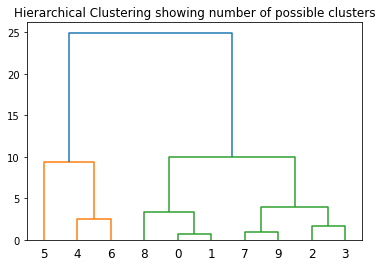

In [156]:
AggloDendogram (under2020_df_T)

In [157]:
from sklearn.decomposition import PCA
import pylab as pl

def KMeansScatterPlot (data, ctitle):
    PCA_ = PCA(n_components = 2).fit(data)
    PCA_2 = PCA_.transform(data)
    pl.rcParams['figure.figsize'] = (8.0, 8.0)
    for i in range(0, PCA_2.shape[0]):
        if data.k_means[i] == 0:
            CLUSTER_01 = pl.scatter(PCA_2[i, 0], PCA_2[i, 1], c='r', marker = 'o', s = 120)
            
        elif data.k_means[i] == 1:
            CLUSTER_02 = pl.scatter(PCA_2[i, 0], PCA_2[i, 1], c='g', marker = 'o', s = 120)
            
        elif data.k_means[i] == 2:
            CLUSTER_03 = pl.scatter(PCA_2[i, 0], PCA_2[i, 1], c='b', marker = 'o', s = 120)
            
        elif data.k_means[i] == 3:
            CLUSTER_04 = pl.scatter(PCA_2[i, 0], PCA_2[i, 1], c='y', marker = 'o', s = 120)
            
    pl.legend([CLUSTER_01, CLUSTER_02, CLUSTER_03],
                 ['Cluster 01', 'Cluster 02', 'Cluster 03'])
    pl.title(ctitle)
    
    pl.show()

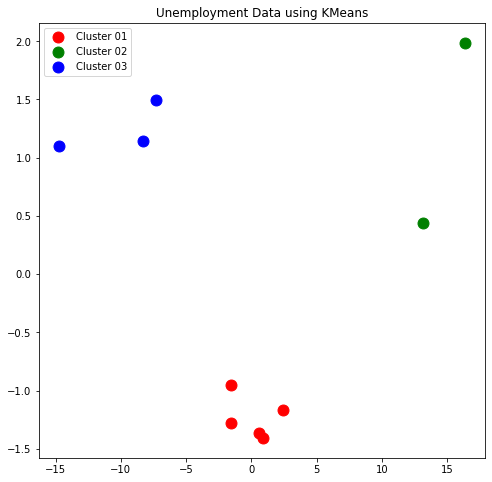

In [158]:
KMeansScatterPlot (unemp2020_df_T, 'Unemployment Data using KMeans')

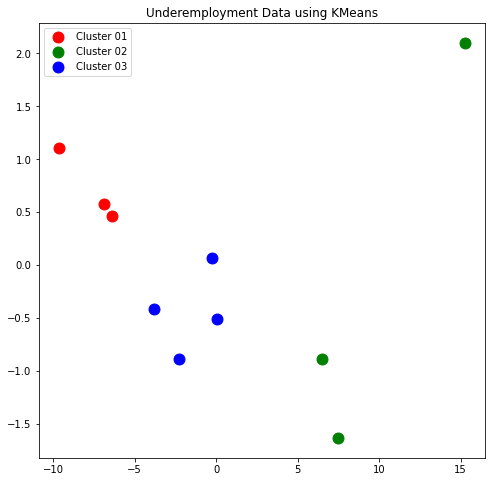

In [159]:
KMeansScatterPlot (under2020_df_T, 'Underemployment Data using KMeans')